Die Grundlage für alle modernen Computer ist die [Digitalisierung](https://de.wikipedia.org/wiki/Digitalisierung). Diese ermöglicht es reale Informationen, Kommunikationsformen oder Anweisungen als eine Folge von zwei Zuständen 1/0 darzustellen. Computersysteme nutzen diese Reduktion bzw. Vereinfachung auf nur zwei Zustände zum Speichern, Übertragen und Verarbeiten von Daten.

Oft werden elektrische Spannungen zur Darstellung der Zustände verwendet. Diese können zeitlich oder auch örtlich, z.B. aufgrund einer Magnetisierung, vorkommen. Die folgende Abbildung verdeutlicht eine Abfolge von Zuständen mit den entsprechenden Zustandswechseln.

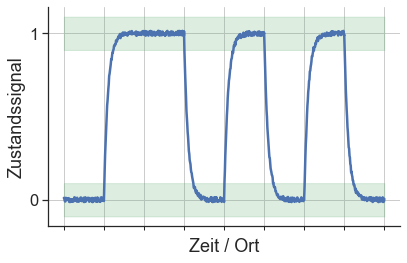

In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
sns.set()
#sns.set(style="whitegrid")
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

#plt.style.use("seaborn-notebook")

nt = 100
t_p = np.linspace(0, 1, nt)

f_up = 1 - np.exp(-t_p*10)
f_down = np.exp(-t_p*10)

def create_signal(s):
    t_global = np.zeros(len(s)*nt)
    s_global = np.zeros_like(t_global)
    t_global[0:nt] = t_p
    s_global[0:nt] = s[0]
    for i in range(1,len(s)):
        t_global[nt*i:nt*(i+1)] = t_p + i
        if s[i] == 0:
            if s[i-1] == 1:
                s_global[nt*i:nt*(i+1)] = f_down
            else:
                s_global[nt*i:nt*(i+1)] = 0
        if s[i] == 1:
            if s[i-1] == 0:
                s_global[nt*i:nt*(i+1)] = f_up
            else:
                s_global[nt*i:nt*(i+1)] = 1    
    # t_global[-nt:] = t_p + len(s)
    # s_global[-nt:] = s[-1]
    return t_global, s_global

s = [0, 1, 1, 0, 1, 0, 1, 0]
c = [0, 1, 0, 1, 0, 1, 0, 1]

t_global, s_global = create_signal(s)
t_global, c_global = create_signal(c)

s_global += (0.5 - np.random.random(len(s_global)))*2 * 0.015
c_global += (0.5 - np.random.random(len(c_global)))*2 * 0.015

plt.plot(t_global, s_global, label='analog')
# plt.scatter(td, fd, label='digital', color="C1")
plt.xlabel("Zeit / Ort")
plt.ylabel("Zustandssignal")

sns.despine()


xmajor_ticks = np.arange(0, len(s)+2, 1)
xminor_ticks = np.arange(0, len(s)+2, 1)
ymajor_ticks = np.arange(0, 2, 1)
yminor_ticks = np.arange(0, 2, 1)

ax = plt.gca()

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

one = np.ones_like(t_global)
plt.fill_between(t_global, 0.9*one, 1.1*one, alpha=0.2, color="C2")
plt.fill_between(t_global, -0.1*one, 0.1*one, alpha=0.2, color="C2")

plt.xticks([])

plt.tight_layout()
plt.grid(which='both')
# plt.legend()
plt.savefig('./bilder/digital_state.png')
# plt.show()
# plt.clf()

Insbesondere bei zeitlich übermittelten Informationen, ist die Definition der Validität des Zustandssignals wichtig. Hierfür kann ein Taktsignal verwendet werden, welches z.B. Zustandsänderungen bei einem Wert von 0 erlaubt und bei einem Wert von 1 kannd der Datenzustand verarbeitet werden.

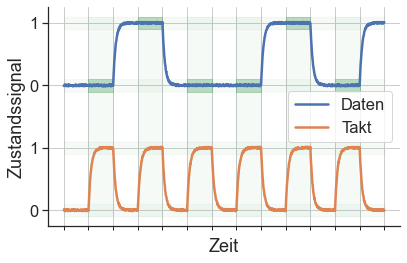

In [3]:
s = [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]
c = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

t_global, s_global = create_signal(s)
t_global, c_global = create_signal(c)

s_global += (0.5 - np.random.random(len(s_global)))*2 * 0.015
c_global += (0.5 - np.random.random(len(c_global)))*2 * 0.015

plt.plot(t_global, s_global + 2, label='Daten')
plt.plot(t_global, c_global, label='Takt')
# plt.scatter(td, fd, label='digital', color="C1")
plt.xlabel("Zeit")
plt.ylabel("Zustandssignal")

sns.despine()


xmajor_ticks = np.arange(0, len(s)+2, 1)
xminor_ticks = np.arange(0, len(s)+2, 1)
ymajor_ticks = np.arange(0, 5, 1)
yminor_ticks = np.arange(0, 5, 1)

ax = plt.gca()

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticklabels(['0','1','0','1'])
# ax.set_yticks(yminor_ticks, minor=True)

plt.xticks([])

one = np.ones_like(t_global)
a1 = 0.05
plt.fill_between(t_global,  0.9*one, 1.1*one, alpha=a1, color="C2")
plt.fill_between(t_global, -0.1*one, 0.1*one, alpha=a1, color="C2")
plt.fill_between(t_global,  2.9*one, 3.1*one, alpha=a1, color="C2")
plt.fill_between(t_global,  1.9*one, 2.1*one, alpha=a1, color="C2")

for i in range(1,len(c),2):
    ax.fill_betweenx([-0.1,3.1], i,i+1, alpha=a1, color="C2")
    if s[i] == 1:
        y0 = 3
    else:
        y0 = 2
    ax.fill_betweenx([y0-0.1,y0+0.1], i,i+1, alpha=7*a1, color="C2")

plt.tight_layout()
plt.grid(which='both')
plt.legend()
plt.savefig('./bilder/digital_state_clock.png')
# plt.show()

In den folgenden Abschnitten wird der Unterschied zwischen analogen und digitalen Informationen verdeutlicht. Dabei wird auch kurz die Umwandlung zwischen beiden Formen vorgestellt. Da Zahlen und Zeichen eine besondere Rolle in der Digitalisierung einnehmen, wird abschließend die digitale Zahlendarstellung für ganze und reelle Zahlen präsentiert.